In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [46]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [48]:
df.shape

(8807, 12)

In [49]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['Day']=df['date_added'].dt.day.astype('Int64')
df['Month']=df['date_added'].dt.month.astype('Int64')
df['Year']=df['date_added'].dt.year.astype('Int64')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  Day           8709 non-null   Int64         
 13  Month         8709 non-null   Int64         
 14  Year          8709 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(

In [53]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [54]:
df['country'] = df['country'].fillna('Unknown')
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

In [55]:
df['main_country'].unique()

array(['United States', 'South Africa', 'Unknown', 'India',
       'United Kingdom', 'Germany', 'Mexico', 'Turkey', 'Australia',
       'Finland', 'China', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', 'Argentina', 'Russia', 'Canada',
       'Hong Kong', 'Italy', '', 'Ireland', 'New Zealand', 'Jordan',
       'Colombia', 'Switzerland', 'Israel', 'Brazil', 'Taiwan',
       'Bulgaria', 'Poland', 'Saudi Arabia', 'Thailand', 'Indonesia',
       'Egypt', 'Kuwait', 'Malaysia', 'Vietnam', 'Sweden', 'Lebanon',
       'Romania', 'Philippines', 'Iceland', 'Denmark',
       'United Arab Emirates', 'Netherlands', 'Norway', 'Syria',
       'Mauritius', 'Austria', 'Czech Republic', 'Cameroon', 'Uruguay',
       'Kenya', 'Chile', 'Luxembourg', 'Bangladesh', 'Portugal',
       'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia', 'Peru',
       'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe', 'Puerto Rico',
       'Pakistan', 'Cyprus', 'Paraguay', 'Croatia', 'Cambodia', 'Georg

In [56]:
df['duration'].isnull().sum()

np.int64(3)

In [57]:
df['duration']=df['duration'].fillna(0)
df['duration'].isnull().sum()

np.int64(0)

In [58]:
df['duration_int'] = df['duration'].astype(str).str.extract('(\d+)').astype(float)


In [59]:
df['duration_type'] = df['duration'].apply(
    lambda x: 'Season' if 'Season' in str(x) else 'Minute'
)


In [60]:
df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')

In [61]:
df['director'].isnull().sum()
df['cast'].isnull().sum()

np.int64(0)

In [62]:
df['rating'] = df['rating'].fillna('Not Rated')


In [63]:
df['genre']=df['listed_in'].apply(lambda x:x.split(',')[0])

In [64]:
df['genre'].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies'],
      dtype=object)

In [65]:
df.isnull().sum()


show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added       98
release_year      0
rating            0
duration          0
listed_in         0
description       0
Day              98
Month            98
Year             98
main_country      0
duration_int      0
duration_type     0
genre             0
dtype: int64

In [66]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year,main_country,duration_int,duration_type,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,United States,90.0,Minute,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,South Africa,2.0,Season,International TV Shows


**Visualization**


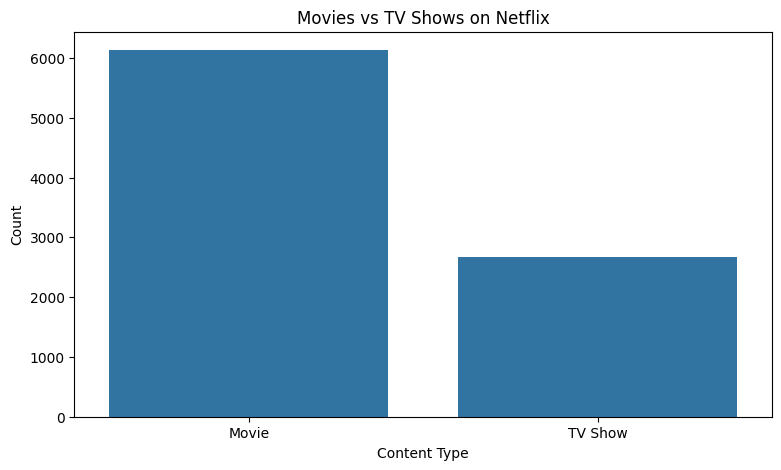

In [67]:
plt.figure(figsize=(9,5))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

**INSIGHTS**

1. Netflix has more Movies than TV Shows
2. Indicates Netflix’s stronger focus on movie-based content
3. TV Shows still form a significant portion, showing balance in long-format content

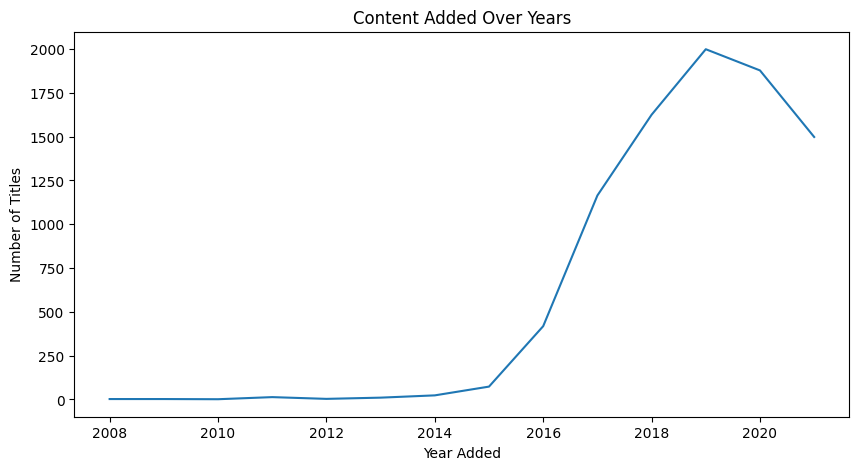

In [68]:
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


**INSIGHTS**

1. There is a sharp rise in content addition after 2015
2. Peak content addition observed around 2018–2020
3. Reflects Netflix’s aggressive expansion and global growth strategy

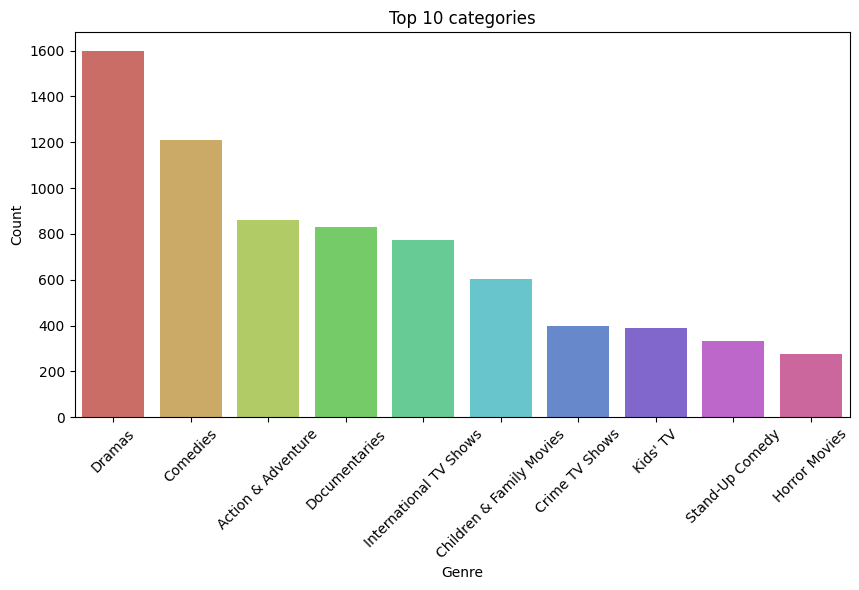

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=df['genre'].value_counts().head(10).index,
    y=df['genre'].value_counts().head(10).values,
    palette='hls'
)
plt.title("Top 10 categories")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**INSIGHTS** 

1. Drama and Comedy dominate Netflix’s content library
2. Indicates strong user demand for entertainment-focused genres
3. Presence of Documentaries shows increasing interest in factual content

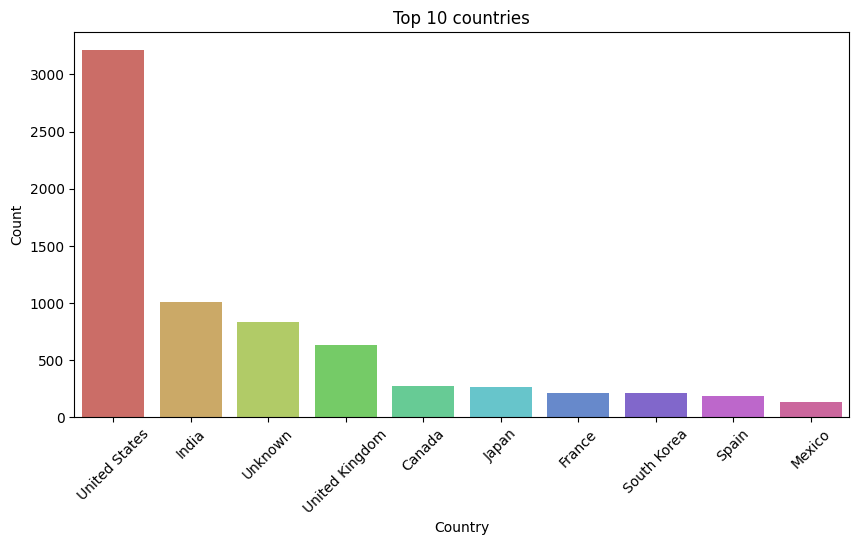

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=df['main_country'].value_counts().head(10).index,
    y=df['main_country'].value_counts().head(10).values,
    palette='hls'
)
plt.title("Top 10 countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**INSIGHTS**

1. United States produces the highest number of titles
2. Followed by India and the UK
3. Shows Netflix’s focus on both Hollywood and international markets

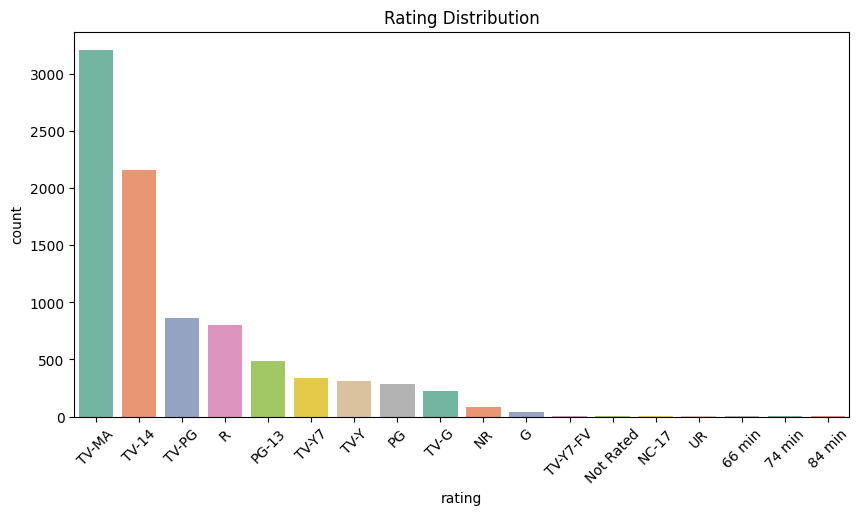

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index,palette='Set2')
plt.title("Rating Distribution")
plt.xticks(rotation=45)
plt.show()


**INSIGHTS**

1. Most content is rated TV-MA and TV-14
2. Netflix targets a teen and adult audience
3. Limited content for very young viewers

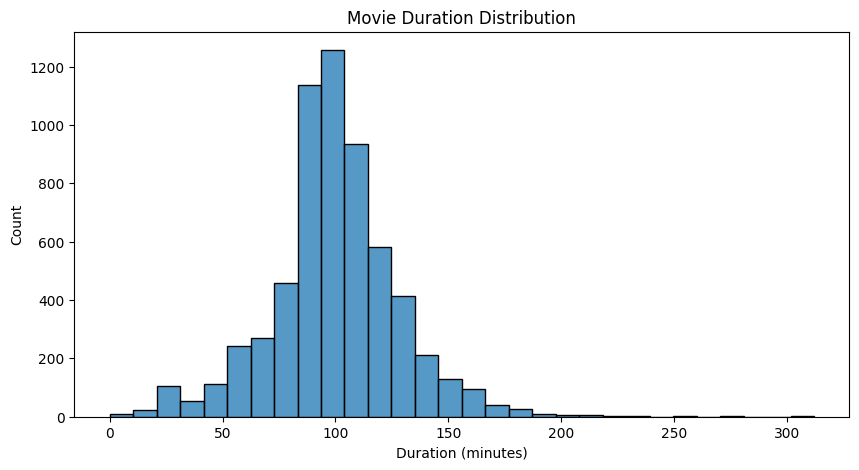

In [72]:
movies = df[df['type'] == 'Movie']

plt.figure(figsize=(10,5))
sns.histplot(movies['duration_int'], bins=30)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.show()


**INSIGHTS**

1. Most movies fall between 80–120 minutes
2. Indicates standard movie-length preference
3. Very few extremely short or very long movies

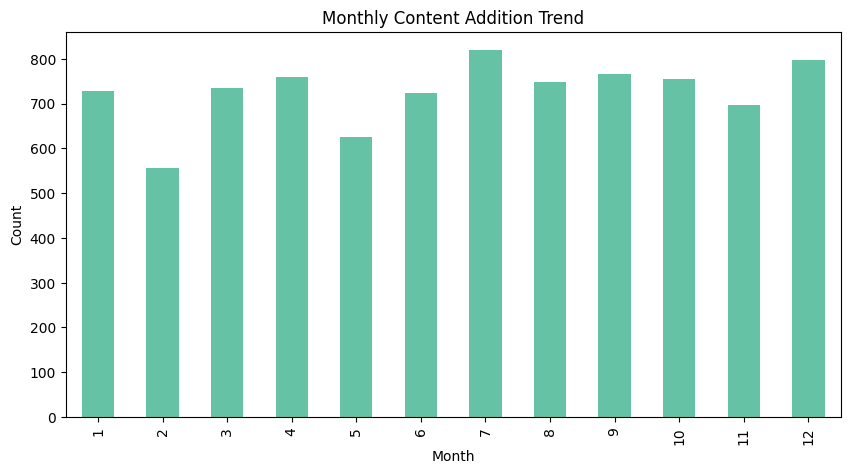

In [73]:
plt.figure(figsize=(10,5))
df['Month'].value_counts().sort_index().plot(kind='bar',colormap='Set2')
plt.title("Monthly Content Addition Trend")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


**INSIGHTS**

1. Content addition is relatively high in July, October, and December
2. Suggests strategic releases around festive and holiday seasons
3. Netflix likely aligns releases with higher viewer activity periods

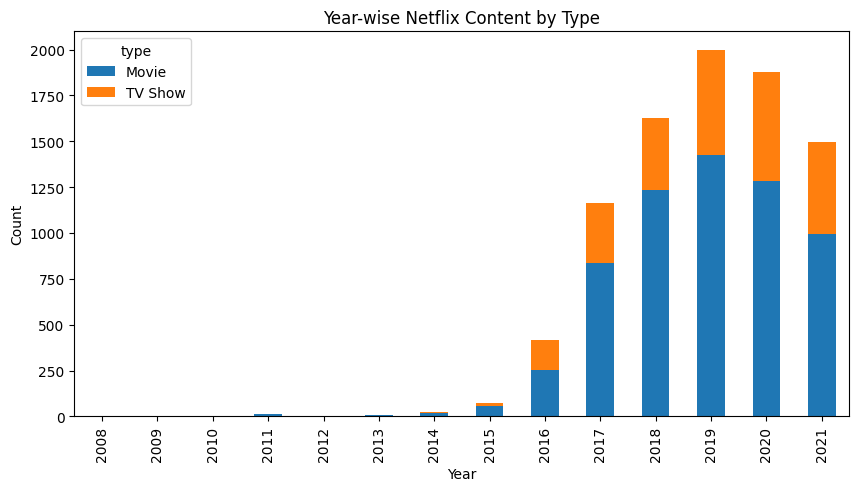

In [74]:
pd.crosstab(df['Year'], df['type']).plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)
plt.title("Year-wise Netflix Content by Type")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


**INSIGHTS**

1. Netflix content additions increased steadily over the years, with a noticeable surge after 2015.
2. Movies consistently contribute a larger share of total content compared to TV Shows across most years.
3. The number of TV Shows has gradually increased, indicating Netflix’s growing investment in long-format and episodic content.